In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [2]:
ticker_symbol = "QQQ"

In [3]:
print(f"正在获取 {ticker_symbol} 的数据...")
tk = yf.Ticker(ticker_symbol)

正在获取 QQQ 的数据...


In [6]:
spot_price = tk.fast_info['last_price']

print(f"标的当前价格: {spot_price:.2f}")

标的当前价格: 623.52


In [7]:
exps = tk.options
exps

('2025-12-03',
 '2025-12-04',
 '2025-12-05',
 '2025-12-08',
 '2025-12-09',
 '2025-12-10',
 '2025-12-11',
 '2025-12-12',
 '2025-12-15',
 '2025-12-16',
 '2025-12-19',
 '2025-12-26',
 '2025-12-31',
 '2026-01-02',
 '2026-01-09',
 '2026-01-16',
 '2026-01-30',
 '2026-02-20',
 '2026-02-27',
 '2026-03-20',
 '2026-03-31',
 '2026-04-17',
 '2026-05-15',
 '2026-06-18',
 '2026-06-30',
 '2026-09-18',
 '2026-09-30',
 '2026-12-18',
 '2027-01-15',
 '2027-06-17',
 '2027-09-17',
 '2027-12-17',
 '2028-01-21')

In [17]:
date = exps[1]
opt = tk.option_chain(date)
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,QQQ251204P00500000,2025-12-03 17:23:53+00:00,500.0,0.01,0.00,0.01,0.000000,0.000000,2,192,0.906251,False,REGULAR,USD
1,QQQ251204P00505000,2025-11-28 17:26:18+00:00,505.0,0.03,0.00,0.01,0.000000,0.000000,1,96,0.875001,False,REGULAR,USD
2,QQQ251204P00510000,2025-12-02 18:35:49+00:00,510.0,0.01,0.00,0.01,0.000000,0.000000,65,498,0.828127,False,REGULAR,USD
3,QQQ251204P00515000,2025-12-02 19:04:20+00:00,515.0,0.02,0.00,0.01,0.000000,0.000000,20,1491,0.781252,False,REGULAR,USD
4,QQQ251204P00520000,2025-12-01 20:33:37+00:00,520.0,0.02,0.00,0.01,0.000000,0.000000,77,206,0.750003,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,QQQ251204P00633000,2025-12-03 19:54:38+00:00,633.0,9.00,7.67,11.45,-2.460000,-21.465970,8,3,0.293708,True,REGULAR,USD
74,QQQ251204P00634000,2025-12-03 20:58:44+00:00,634.0,10.37,8.67,12.39,-5.080000,-32.880260,136,9,0.305671,True,REGULAR,USD
75,QQQ251204P00635000,2025-12-03 20:17:15+00:00,635.0,10.87,9.67,13.00,-1.280000,-10.534977,11,9,0.292732,True,REGULAR,USD
76,QQQ251204P00640000,2025-12-03 20:46:32+00:00,640.0,15.92,15.00,18.52,-1.520001,-8.715599,2,3,0.407477,True,REGULAR,USD


In [ ]:
all_options = []

for date in exps[:30]: 
    print(f"正在下载到期日为 {date} 的数据...")
    opt = tk.option_chain(date)
    
    # 处理 Calls
    calls = opt.calls
    calls['type'] = 'call'
    calls['expiration'] = date
    
    # 处理 Puts
    puts = opt.puts
    puts['type'] = 'put'
    puts['expiration'] = date
    
    # 合并
    all_options.append(pd.concat([calls, puts]))

正在下载到期日为 2025-12-03 的数据...
正在下载到期日为 2025-12-04 的数据...
正在下载到期日为 2025-12-05 的数据...
正在下载到期日为 2025-12-08 的数据...
正在下载到期日为 2025-12-09 的数据...
正在下载到期日为 2025-12-10 的数据...
正在下载到期日为 2025-12-11 的数据...
正在下载到期日为 2025-12-12 的数据...
正在下载到期日为 2025-12-15 的数据...
正在下载到期日为 2025-12-16 的数据...
正在下载到期日为 2025-12-19 的数据...
正在下载到期日为 2025-12-26 的数据...
正在下载到期日为 2025-12-31 的数据...
正在下载到期日为 2026-01-02 的数据...
正在下载到期日为 2026-01-09 的数据...
正在下载到期日为 2026-01-16 的数据...
正在下载到期日为 2026-01-30 的数据...
正在下载到期日为 2026-02-20 的数据...
正在下载到期日为 2026-02-27 的数据...
正在下载到期日为 2026-03-20 的数据...
正在下载到期日为 2026-03-31 的数据...
正在下载到期日为 2026-04-17 的数据...
正在下载到期日为 2026-05-15 的数据...
正在下载到期日为 2026-06-18 的数据...
正在下载到期日为 2026-06-30 的数据...
正在下载到期日为 2026-09-18 的数据...
正在下载到期日为 2026-09-30 的数据...
正在下载到期日为 2026-12-18 的数据...
正在下载到期日为 2027-01-15 的数据...
正在下载到期日为 2027-06-17 的数据...


In [19]:
df = pd.concat(all_options, ignore_index=True)
df['expiration'] = pd.to_datetime(df['expiration'])
today = datetime.now()
df['days_to_expiry'] = (df['expiration'] - today).dt.days
df['T'] = df['days_to_expiry'] / 365.0 # 年化时间

# 2. 计算中间价 (Mid Price) - 用于构建曲面
df['mid_price'] = (df['bid'] + df['ask']) / 2

# 3. 添加标的价格列
df['spot_price'] = spot_price

# 4. 计算 Moneyness (K/S)
df['moneyness'] = df['strike'] / df['spot_price']

# 筛选我们需要用来构建曲面的列
cols = ['contractSymbol', 'expiration', 'type', 'strike', 'bid', 'ask', 'mid_price', 'impliedVolatility', 'T', 'moneyness']

print("\n数据获取成功！")
print(f"共获取 {len(df)} 条合约数据。")


数据获取成功！
共获取 6932 条合约数据。


In [20]:
df.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,inTheMoney,contractSize,currency,type,expiration,days_to_expiry,T,mid_price,spot_price,moneyness
0,QQQ251203C00505000,2025-12-03 20:40:32+00:00,505.0,118.90,116.56,120.33,1.480003,1.260436,10.0,10.0,...,True,REGULAR,USD,call,2025-12-03,-1,-0.00274,118.445,623.52002,0.809918
1,QQQ251203C00520000,2025-11-19 21:06:30+00:00,520.0,81.27,101.51,105.34,0.000000,0.000000,NaN,1.0,...,True,REGULAR,USD,call,2025-12-03,-1,-0.00274,103.425,623.52002,0.833975
2,QQQ251203C00525000,2025-12-03 18:57:56+00:00,525.0,97.80,96.51,100.34,1.400001,1.452284,21.0,41.0,...,True,REGULAR,USD,call,2025-12-03,-1,-0.00274,98.425,623.52002,0.841994
3,QQQ251203C00530000,2025-12-03 20:01:28+00:00,530.0,93.84,91.51,95.34,1.079994,1.164289,3.0,1.0,...,True,REGULAR,USD,call,2025-12-03,-1,-0.00274,93.425,623.52002,0.850013
4,QQQ251203C00540000,2025-12-03 20:08:59+00:00,540.0,83.78,81.51,85.34,1.650001,2.009012,129.0,61.0,...,True,REGULAR,USD,call,2025-12-03,-1,-0.00274,83.425,623.52002,0.866051


正在获取 SPY 数据...
标的价格 S0: 683.18
正在对所有合约计算 IV (包含 ITM 和 OTM)...


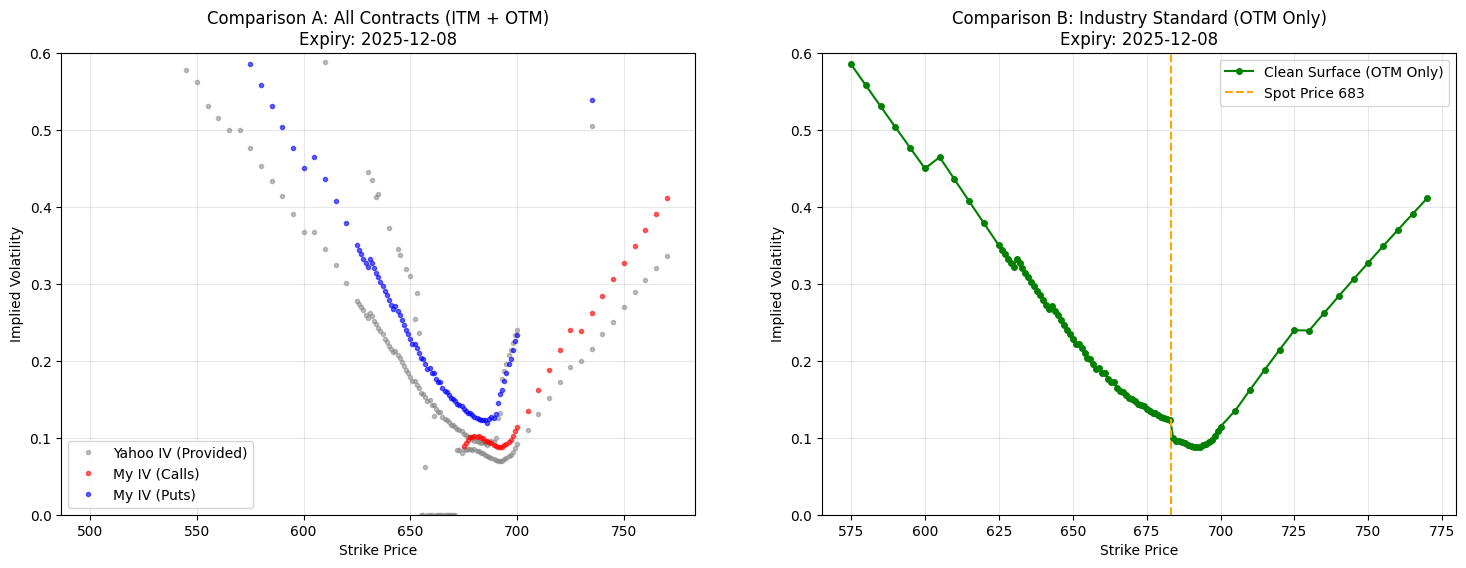

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime

# ==========================================
# 1. 基础模型 (BSM Solver)
# ==========================================
def bs_price(S, K, T, r, q, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

def bs_vega(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)

def implied_volatility(market_price, S, K, T, r, q, option_type='call'):
    # 牛顿法求解
    sigma = 0.4 # Initial guess
    for i in range(50):
        price = bs_price(S, K, T, r, q, sigma, option_type)
        vega = bs_vega(S, K, T, r, q, sigma)
        diff = market_price - price
        if abs(diff) < 1e-5: return sigma
        if abs(vega) < 1e-8: return np.nan # Vega过小（深实值/虚值）导致发散
        sigma += diff / vega
    return np.nan

# ==========================================
# 2. 获取原始数据 (不清洗)
# ==========================================
def get_raw_data(ticker):
    print(f"正在获取 {ticker} 数据...")
    tk = yf.Ticker(ticker)
    try:
        S0 = tk.fast_info['last_price']
    except:
        S0 = tk.history(period='1d')['Close'].iloc[-1]
    
    print(f"标的价格 S0: {S0:.2f}")
    
    # 获取前 6 个到期日
    exps = tk.options[:15]
    all_opts = []
    
    # 硬编码参数用于对比
    R = 0.045
    Q = 0.013 

    for date in exps:
        opt = tk.option_chain(date)
        # 获取 Call 和 Put
        c = opt.calls.copy(); c['type'] = 'call'
        p = opt.puts.copy();  p['type'] = 'put'
        chain = pd.concat([c, p])
        chain['expiration'] = pd.to_datetime(date)
        all_opts.append(chain)
        
    df = pd.concat(all_opts, ignore_index=True)
    
    # 基础处理
    today = datetime.now()
    df['T'] = (df['expiration'] - today).dt.days / 365.0
    df = df[df['T'] > 0.005] # 哪怕是全数据，也得剔除T=0，否则除以0报错
    df['mid_price'] = (df['bid'] + df['ask']) / 2
    df['S0'] = S0
    df['moneyness'] = df['strike'] / S0
    
    # --- 计算 Custom IV (对所有点计算，不筛选！) ---
    print("正在对所有合约计算 IV (包含 ITM 和 OTM)...")
    df['my_iv'] = df.apply(lambda x: implied_volatility(
        x['mid_price'], S0, x['strike'], x['T'], R, Q, x['type']
    ), axis=1)
    
    return df

# ==========================================
# 3. 2D 切片对比可视化 (最直观)
# ==========================================
def plot_comparison_2d(df, expiry_date):
    """
    画出一个特定到期日的 Smile 曲线对比
    """
    subset = df[df['expiration'] == expiry_date].copy()
    subset = subset.sort_values('strike')
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # --- 图 1: Yahoo IV vs My IV (全部数据点) ---
    ax1 = axes[0]
    # Yahoo IV
    ax1.plot(subset['strike'], subset['impliedVolatility'], 'o', label='Yahoo IV (Provided)', alpha=0.5, markersize=3, color='gray')
    # My IV (Calls)
    ax1.plot(subset[subset['type']=='call']['strike'], subset[subset['type']=='call']['my_iv'], 
             '.', label='My IV (Calls)', color='red', alpha=0.6)
    # My IV (Puts)
    ax1.plot(subset[subset['type']=='put']['strike'], subset[subset['type']=='put']['my_iv'], 
             '.', label='My IV (Puts)', color='blue', alpha=0.6)
    
    ax1.set_title(f'Comparison A: All Contracts (ITM + OTM)\nExpiry: {expiry_date.date()}')
    ax1.set_xlabel('Strike Price')
    ax1.set_ylabel('Implied Volatility')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 0.6) # 限制Y轴防止某些错误数据跑飞
    
    # --- 图 2: 工业界标准 (只取 OTM 拼接) ---
    ax2 = axes[1]
    
    # 筛选 OTM: Call if K > S, Put if K < S
    otm_mask = (
        ((subset['type'] == 'call') & (subset['strike'] > subset['S0'])) |
        ((subset['type'] == 'put')  & (subset['strike'] < subset['S0']))
    )
    clean_data = subset[otm_mask]
    
    # 绘制清洗后的曲线
    ax2.plot(clean_data['strike'], clean_data['my_iv'], 'o-', label='Clean Surface (OTM Only)', color='green', markersize=4)
    
    # 标记当前价格
    S0 = subset['S0'].iloc[0]
    ax2.axvline(S0, color='orange', linestyle='--', label=f'Spot Price {S0:.0f}')
    
    ax2.set_title(f'Comparison B: Industry Standard (OTM Only)\nExpiry: {expiry_date.date()}')
    ax2.set_xlabel('Strike Price')
    ax2.set_ylabel('Implied Volatility')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 0.6)

    plt.show()

# ==========================================
# 主运行
# ==========================================
df = get_raw_data("SPY")

# 选取第 2 个到期日进行详细切片分析 (通常流动性最好且最有代表性)
target_expiry = df['expiration'].unique()[0] 
plot_comparison_2d(df, target_expiry)

In [5]:
df.expiration.sort_values()

419    2025-12-08
535    2025-12-08
536    2025-12-08
537    2025-12-08
538    2025-12-08
          ...    
930    2025-12-11
929    2025-12-11
928    2025-12-11
926    2025-12-11
1006   2025-12-11
Name: expiration, Length: 588, dtype: datetime64[ns]

<>:124: SyntaxWarning: invalid escape sequence '\s'
<>:124: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_53039/1439712419.py:124: SyntaxWarning: invalid escape sequence '\s'
  ax.set_zlabel('Implied Volatility ($\sigma$)', fontsize=10)


1. Fetching data for SPY...
   Spot Price: 683.89
2. Processing Option Chain & Calculating IV...
3. Rendering 3D Surface...


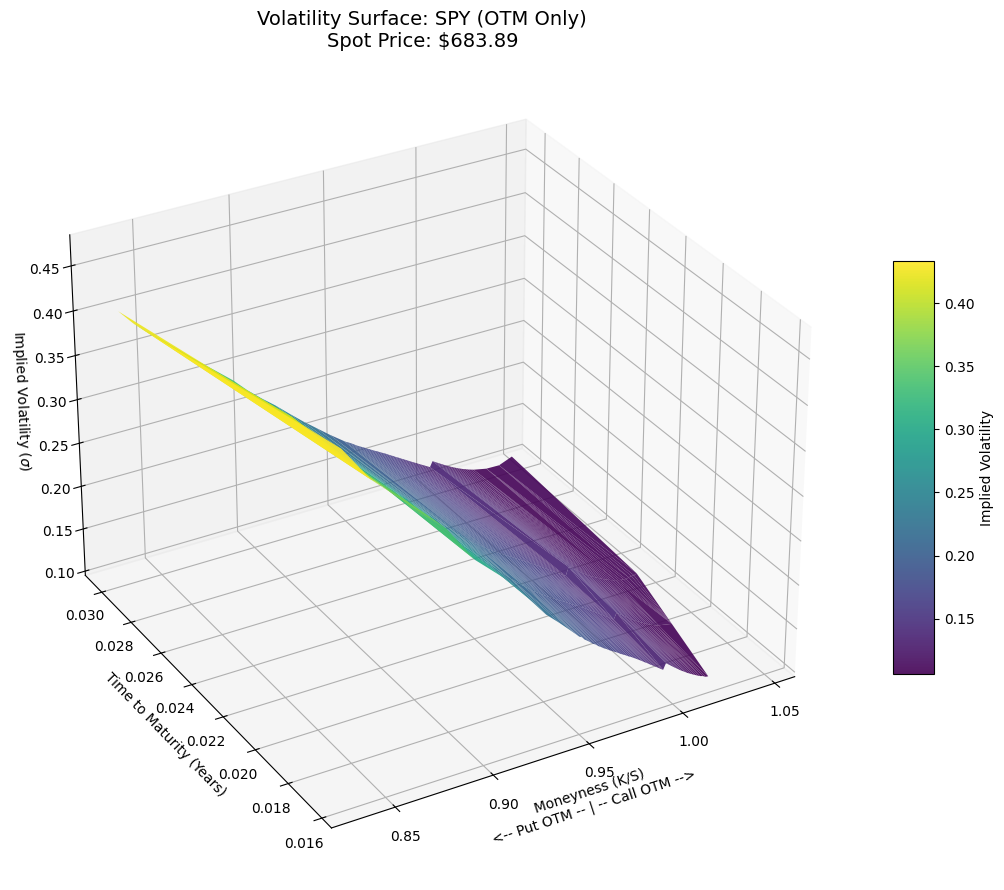

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from datetime import datetime

# ==========================================
# 1. 核心数学库 (BSM Solver)
# ==========================================
def bs_price(S, K, T, r, q, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

def bs_vega(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)

def implied_volatility(market_price, S, K, T, r, q, option_type='call'):
    sigma = 0.4 # 初始猜测
    for i in range(20): # 牛顿法迭代
        price = bs_price(S, K, T, r, q, sigma, option_type)
        vega = bs_vega(S, K, T, r, q, sigma)
        diff = market_price - price
        if abs(diff) < 1e-5: return sigma
        if abs(vega) < 1e-8: return np.nan
        sigma += diff / vega
    return np.nan

# ==========================================
# 2. 数据获取与清洗 (The Cleaning Pipeline)
# ==========================================
def get_surface_data(ticker):
    print(f"1. Fetching data for {ticker}...")
    tk = yf.Ticker(ticker)
    
    # 获取标的价格
    try:
        S0 = tk.fast_info['last_price']
    except:
        S0 = tk.history(period='1d')['Close'].iloc[-1]
    print(f"   Spot Price: {S0:.2f}")

    # 获取期权链 (取前 6 个月内的到期日)
    exps = tk.options[:8] 
    all_data = []
    
    # 硬编码利率参数 (简化)
    R = 0.045
    Q = 0.013 

    print("2. Processing Option Chain & Calculating IV...")
    for date in exps:
        opt = tk.option_chain(date)
        
        # 分别处理 Call 和 Put
        calls = opt.calls.copy(); calls['type'] = 'call'
        puts = opt.puts.copy();   puts['type'] = 'put'
        
        # --- 关键步骤：只保留 OTM (Out-of-the-Money) ---
        # Call 只取 K > S, Put 只取 K < S
        calls = calls[calls['strike'] > S0]
        puts = puts[puts['strike'] < S0]
        
        chain = pd.concat([calls, puts])
        chain['expiration'] = pd.to_datetime(date)
        all_data.append(chain)

    df = pd.concat(all_data, ignore_index=True)
    
    # 计算时间 T
    today = datetime.now()
    df['T'] = (df['expiration'] - today).dt.days / 365.0
    
    # 过滤：剔除极短到期 (T < 5天) 和 极低价格
    df = df[(df['T'] > 0.015) & (df['lastPrice'] > 0.05)]
    
    # 计算 Mid Price
    df['mid_price'] = (df['bid'] + df['ask']) / 2
    
    # 批量计算 IV
    df['my_iv'] = df.apply(lambda x: implied_volatility(
        x['mid_price'], S0, x['strike'], x['T'], R, Q, x['type']
    ), axis=1)
    
    # 剔除无效点
    df = df.dropna(subset=['my_iv'])
    df = df[(df['my_iv'] > 0.05) & (df['my_iv'] < 1.5)] # 剔除异常值
    
    # 计算 Moneyness (K/S)
    df['moneyness'] = df['strike'] / S0
    
    return df, S0

# ==========================================
# 3. 绘制 3D 曲面
# ==========================================
def plot_3d_surface(df, spot_price):
    print("3. Rendering 3D Surface...")
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    # 准备坐标轴数据
    # X: Moneyness (K/S) -> 1.0 代表平值
    # Y: Time to Maturity (Years)
    # Z: Implied Volatility
    x = df['moneyness']
    y = df['T']
    z = df['my_iv']

    # 绘制三角剖分曲面 (Tri-Surface Plot)
    # cmap='viridis' 颜色映射: 黄色=高IV, 紫色=低IV
    surf = ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9, shade=True)

    # 美化图表
    ax.set_title(f'Volatility Surface: SPY (OTM Only)\nSpot Price: ${spot_price:.2f}', fontsize=14)
    ax.set_xlabel('Moneyness (K/S)\n<-- Put OTM -- | -- Call OTM -->', fontsize=10)
    ax.set_ylabel('Time to Maturity (Years)', fontsize=10)
    ax.set_zlabel('Implied Volatility ($\sigma$)', fontsize=10)
    
    # 设置视角 (Elev=高度角, Azim=方位角)
    ax.view_init(elev=30, azim=-120)

    # 颜色条
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('Implied Volatility')

    plt.tight_layout()
    plt.show()

# ==========================================
# 主程序
# ==========================================
if __name__ == "__main__":
    data, S0 = get_surface_data("SPY")
    
    if not data.empty:
        plot_3d_surface(data, S0)
    else:
        print("未获取到有效数据，请检查网络或非交易时间。")

1. 初始化: 获取 SPY 基础信息...
   标的价格 S0: $683.89
2. 正在筛选最优期限 (目标: [14, 30, 60, 90, 180, 270, 365, 540, 730] 天)...
   最终选中 9 个到期日: ['2025-12-19', '2026-01-02', '2026-01-30', '2026-02-27', '2026-05-29', '2026-09-18', '2026-12-18', '2027-06-17', '2027-12-17']
3. 批量下载并计算 IV (这需要一点时间)...
4. 渲染 3D 曲面...


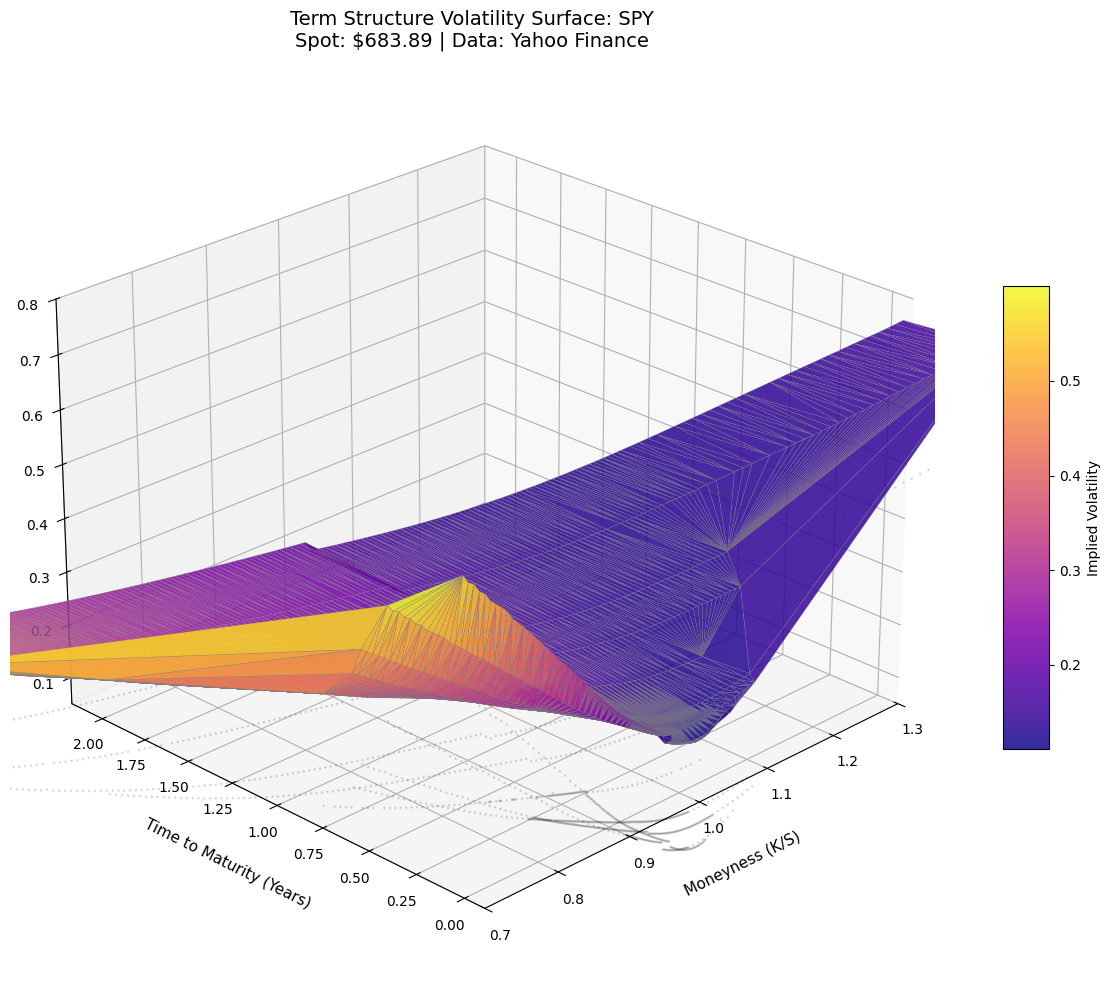

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from datetime import datetime, timedelta

# ==========================================
# 1. BSM 定价引擎 (保持核心数学不变)
# ==========================================
def bs_price(S, K, T, r, q, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

def bs_vega(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)

def implied_volatility(market_price, S, K, T, r, q, option_type='call'):
    sigma = 0.4 # 初始猜测
    for i in range(20):
        price = bs_price(S, K, T, r, q, sigma, option_type)
        vega = bs_vega(S, K, T, r, q, sigma)
        diff = market_price - price
        if abs(diff) < 1e-5: return sigma
        if abs(vega) < 1e-8: return np.nan
        sigma += diff / vega
    return np.nan

# ==========================================
# 2. 全新设计的智能数据抓取
# ==========================================
def get_term_structure_data(ticker):
    print(f"1. 初始化: 获取 {ticker} 基础信息...")
    tk = yf.Ticker(ticker)
    
    # 获取标的价格
    try:
        S0 = tk.fast_info['last_price']
    except:
        S0 = tk.history(period='1d')['Close'].iloc[-1]
    print(f"   标的价格 S0: ${S0:.2f}")

    # === 核心修改：智能期限采样 (Smart Term Structure Sampling) ===
    all_exps = tk.options
    today = datetime.now()
    
    # 我们希望捕捉的时间点 (单位：天)
    # 覆盖：近端(14天), 中端(30-90天), 远端(半年-2年)
    target_days = [14, 30, 60, 90, 180, 270, 365, 540, 730]
    selected_dates = []
    
    print(f"2. 正在筛选最优期限 (目标: {target_days} 天)...")
    
    for target in target_days:
        best_date = None
        min_diff = float('inf')
        
        for date_str in all_exps:
            exp_date = pd.to_datetime(date_str)
            days_to_exp = (exp_date - today).days
            
            # 找到距离 target 最近的那个到期日
            diff = abs(days_to_exp - target)
            if diff < min_diff:
                min_diff = diff
                best_date = date_str
        
        # 避免重复添加同一个日期
        if best_date and best_date not in selected_dates:
            selected_dates.append(best_date)
            
    print(f"   最终选中 {len(selected_dates)} 个到期日: {selected_dates}")
    
    # === 开始下载数据 ===
    all_data = []
    R = 0.045 # 无风险利率
    Q = 0.013 # 分红率

    print("3. 批量下载并计算 IV (这需要一点时间)...")
    for date in selected_dates:
        try:
            opt = tk.option_chain(date)
            calls = opt.calls.copy(); calls['type'] = 'call'
            puts = opt.puts.copy();   puts['type'] = 'put'
            
            # OTM 筛选逻辑
            calls = calls[calls['strike'] > S0]
            puts = puts[puts['strike'] < S0]
            
            chain = pd.concat([calls, puts])
            chain['expiration'] = pd.to_datetime(date)
            all_data.append(chain)
        except Exception as e:
            print(f"   跳过日期 {date}: {e}")

    df = pd.concat(all_data, ignore_index=True)
    
    # 计算 T (年化)
    df['T'] = (df['expiration'] - today).dt.days / 365.0
    df = df[df['T'] > 0.005] # 剔除即将到期
    
    # 计算价格和 IV
    df['mid_price'] = (df['bid'] + df['ask']) / 2
    df = df[df['mid_price'] > 0.05] # 剔除垃圾价格
    
    # 批量计算 IV
    df['my_iv'] = df.apply(lambda x: implied_volatility(
        x['mid_price'], S0, x['strike'], x['T'], R, Q, x['type']
    ), axis=1)
    
    df = df.dropna(subset=['my_iv'])
    df = df[(df['my_iv'] > 0.01) & (df['my_iv'] < 1.0)] # 剔除异常值
    df['moneyness'] = df['strike'] / S0
    
    return df, S0

# ==========================================
# 3. 增强版 3D 绘图 (更好的视角和网格)
# ==========================================
def plot_enhanced_surface(df, spot_price):
    print("4. 渲染 3D 曲面...")
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    x = df['moneyness']
    y = df['T']
    z = df['my_iv']

    # 使用 plot_trisurf 绘制曲面
    surf = ax.plot_trisurf(x, y, z, cmap='plasma', edgecolor='gray', linewidth=0.2, alpha=0.85, antialiased=True)

    # 绘制底部的投影点，增加立体感
    ax.scatter(x, y, z - 0.2, c='black', s=1, alpha=0.1)

    # 设置标签
    ax.set_xlabel('\nMoneyness (K/S)', fontsize=11, labelpad=10)
    ax.set_ylabel('\nTime to Maturity (Years)', fontsize=11, labelpad=10)
    ax.set_zlabel('\nImplied Volatility', fontsize=11, labelpad=10)
    
    ax.set_title(f'Term Structure Volatility Surface: SPY\nSpot: ${spot_price:.2f} | Data: Yahoo Finance', fontsize=14)

    # 限制坐标轴范围，让图看起来更紧凑
    ax.set_xlim(0.7, 1.3) # 限制 Moneyness 在 0.7 - 1.3 之间 (剔除极端的深度虚值)
    ax.set_zlim(0.05, 0.8) # 限制 IV 显示范围

    # 调整视角：这个角度最能看清 "Skew" 和 "Term Structure"
    ax.view_init(elev=25, azim=-135)

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Implied Volatility')
    plt.tight_layout()
    plt.show()

# ==========================================
# 执行
# ==========================================
if __name__ == "__main__":
    data, S0 = get_term_structure_data("SPY")
    
    if not data.empty:
        plot_enhanced_surface(data, S0)
    else:
        print("未获取到数据。")